In [3]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import rioxarray
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import rasterio
import os
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import xarray
import itertools
import matplotlib.colors as mcolors
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import warnings
from shapely.geometry import box


In [6]:
# one taxa only 
taxas=["Mammals"]
models=["GAM"]
time=35
model_names = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']
scenario="rcp26"
netcdf_path_format = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"
for taxa in taxas:
    for model in models:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + model + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]

    species_names = available_names[:10]


newvalue_dict = {model_name: {} for model_name in model_names}
sum_bin_dict = {model_name: {} for model_name in model_names}

for model_name in model_names:
    for species_name in species_names:
        ds = xr.open_dataset(netcdf_path_format.format(model, taxa, model_name, scenario, species_name, time), decode_times=False)

        newvalue = ds["newvalue"]
        sum_bin = ds["sum_bin"]

        newvalue_dict[model_name][species_name] = newvalue
        sum_bin_dict[model_name][species_name] = sum_bin
def calculate_mean_value_bin(species_names, model_names, newvalue_dict):
    projections_dict = {}
    for species_name in species_names:
        value_list = []
        for model_name in model_names:
            value_bin = sum_bin_dict[model_name][species_name]
            value_list.append(value_bin)
        value_bin_concat = xr.concat(value_list, dim="model_name")
        mean_value_bin = value_bin_concat.mean(dim="model_name")
        projections_dict[species_name] = mean_value_bin.mean()
        
    return projections_dict


result = calculate_mean_value_bin(species_names, model_names, sum_bin_dict)
mean_values = [float(np.array(value)) for value in result.values()]

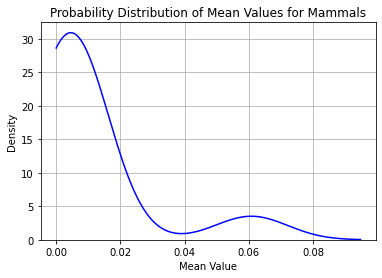

In [7]:
# Create a KDE plot or a line plot for all mean values
sns.kdeplot(mean_values, color='blue', clip=(0, None))  # Use sns.kdeplot for a KDE plot
# plt.plot(mean_values, color='blue')   # Use plt.plot for a line plot
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.title('Probability Distribution of Mean Values for Mammals')
plt.grid(True)
plt.show()

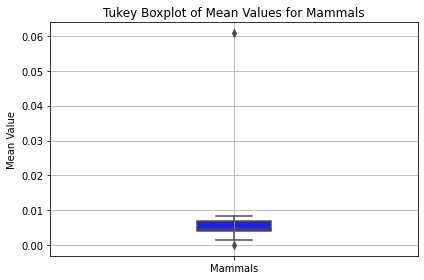

In [8]:
# Create a Tukey boxplot using Seaborn
sns.boxplot(y=mean_values, color='blue', width=0.2)
plt.xticks([0], ['Mammals'])
plt.ylabel('Mean Value')
plt.title('Tukey Boxplot of Mean Values for Mammals')
plt.grid(True)
plt.tight_layout()
plt.show()

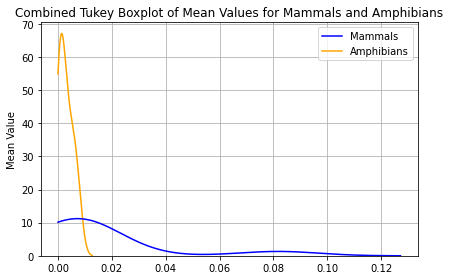

In [9]:
#multiple taxa, one model
# Define your variables
taxas = ["Mammals", "Amphibians"]
models = ["GBM"]
time = 35
model_names = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']
netcdf_path_format = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"

# Function to calculate mean value bin
def calculate_mean_value_bin(species_names, model_names, sum_bin_dict):
    projections_dict = {}
    for species_name in species_names:
        value_list = []
        for model_name in model_names:
            value_bin = sum_bin_dict[model_name][species_name]
            value_list.append(value_bin)
        value_bin_concat = xr.concat(value_list, dim="model_name")
        mean_value_bin = value_bin_concat.mean(dim="model_name")
        projections_dict[species_name] = mean_value_bin.mean()
    return projections_dict

data_dict = {}  # Dictionary to store species names for each taxa and model
for taxa in taxas:
    data_dict[taxa] = {}
    for model in models:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + model + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]
        data_dict[taxa][model] = available_names[:10]  # Get the first 10 species names

data = {taxa: [] for taxa in taxas}
for taxa in taxas:
    species_names = data_dict[taxa][models[0]]
    newvalue_dict = {model_name: {} for model_name in model_names}
    sum_bin_dict = {model_name: {} for model_name in model_names}
    
    for model_name in model_names:
        for species_name in species_names:
            ds = xr.open_dataset(netcdf_path_format.format(model, taxa, model_name, scenario, species_name, time), decode_times=False)
            newvalue = ds["newvalue"]
            sum_bin = ds["sum_bin"]
            newvalue_dict[model_name][species_name] = newvalue
            sum_bin_dict[model_name][species_name] = sum_bin

    result = calculate_mean_value_bin(species_names, model_names, sum_bin_dict)
    mean_values = [float(np.array(value)) for value in result.values()]
    data[taxa] = mean_values

df = pd.DataFrame(data, columns=taxas)

# Create a combined Tukey boxplot
sns.kdeplot(data=df, palette=['blue', 'orange'], clip=(0,None))
plt.ylabel('Mean Value')
plt.title('Combined Tukey Boxplot of Mean Values for Mammals and Amphibians')
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import os

# Define your variables
taxas = ["Mammals", "Amphibians"]
sdms = ["GAM", "GBM"]
time = 35
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
years = ['1845', '1990', '1995', '2009', '2010', '2020', '2026', '2032', '2048', '2050',
         '2052', '2056', '2080', '2100', '2150', '2200', '2250']
netcdf_path_format = "/storage/scratch/users/ch21o450/data/LandClim_Output/{}/{}/{}/{}/{}_[{}].nc"


# Function to calculate mean value bin
def calculate_mean_value_bin(species_names,sdms, gcms, sum_bin_dict):
    projections_dict = {}
    for species_name in species_names:
        value_list = []
        for gcm in gcms:
            model_mean_values=[]
            for sdm in sdms:
                value_bin = sum_bin_dict[sdm][gcm][species_name]
                model_mean_values.append(value_bin)
            model_mean_concat = xr.concat(model_mean_values, dim="sdm")
            model_mean = model_mean_concat.mean(dim="sdm")
            value_list.append(model_mean)
        value_bin_concat = xr.concat(value_list, dim="gcm")
        mean_value_bin = value_bin_concat.mean(dim="gcm")
        projections_dict[species_name] = mean_value_bin.mean()
    return projections_dict

data_dict = {}  # Dictionary to store species names for each taxa and model
for taxa in taxas:
    data_dict[taxa] = {}
    for sdm in sdms:
        dir_species = "/storage/scratch/users/ch21o450/data/LandClim_Output/" + sdm + "/" + taxa + "/EWEMBI/"
        available_file = os.listdir(dir_species)
        available_names = [x.split("_[1146].nc")[0] for x in available_file]
        data_dict[taxa][model] = available_names # Get the first 10 species names

data = {taxa: [] for taxa in taxas}
for taxa in taxas:
    species_names = data_dict[taxa][sdm]
    newvalue_dict = {sdm: {gcm: {} for gcm in gcms} for sdm in sdms}
    sum_bin_dict = {sdm: {gcm: {} for gcm in gcms} for sdm in sdms}
    
    for sdm in sdms: 
        for gcm in gcms:
       
            for species_name in species_names:
                ds = xr.open_dataset(netcdf_path_format.format(sdm, taxa, gcm, scenario, species_name, time), decode_times=False)
                newvalue = ds["newvalue"]
                sum_bin = ds["sum_bin"]
                newvalue_dict[sdm][gcm][species_name] = newvalue
                sum_bin_dict[sdm][gcm][species_name] = sum_bin

    result = calculate_mean_value_bin(species_names,sdms, gcms, sum_bin_dict)
    mean_values = [float(np.array(value)) for value in result.values()]
    data[taxa] = mean_values

df = pd.DataFrame(data, columns=taxas)

# Create a combined Tukey boxplot
sns.kdeplot(data=df, palette=['blue', 'orange'], clip=(0,None))
plt.ylabel('Mean Value')
plt.title('Combined Tukey Boxplot of Mean Values for Mammals and Amphibians')
plt.grid(True)
plt.tight_layout()
plt.show()



NameError: name 'model' is not defined